# Numerical Integration: The Trapezoidal Rule

## Introduction

The **Trapezoidal Rule** is a fundamental numerical integration technique used to approximate the definite integral of a function. It belongs to the family of Newton-Cotes formulas and provides a simple yet effective method for computing integrals when analytical solutions are difficult or impossible to obtain.

## Mathematical Foundation

### The Definite Integral

For a continuous function $f(x)$ on the interval $[a, b]$, the definite integral is defined as:

$$I = \int_a^b f(x) \, dx$$

This integral represents the signed area under the curve $f(x)$ between $x = a$ and $x = b$.

### Derivation of the Trapezoidal Rule

The basic idea is to approximate the area under the curve by dividing the interval $[a, b]$ into $n$ subintervals of equal width $h$, where:

$$h = \frac{b - a}{n}$$

The subinterval endpoints are:

$$x_i = a + ih, \quad i = 0, 1, 2, \ldots, n$$

Within each subinterval $[x_i, x_{i+1}]$, we approximate the function by a linear interpolant (a straight line connecting the endpoints). The area of each trapezoid is:

$$A_i = \frac{h}{2}\left[f(x_i) + f(x_{i+1})\right]$$

### Composite Trapezoidal Rule

Summing over all subintervals, we obtain the **Composite Trapezoidal Rule**:

$$\int_a^b f(x) \, dx \approx \frac{h}{2}\left[f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n)\right]$$

Or equivalently:

$$\int_a^b f(x) \, dx \approx h\left[\frac{f(a) + f(b)}{2} + \sum_{i=1}^{n-1} f(x_i)\right]$$

### Error Analysis

The truncation error for the composite trapezoidal rule is:

$$E_T = -\frac{(b-a)h^2}{12}f''(\xi)$$

where $\xi \in [a, b]$. This shows that the error is $O(h^2)$, meaning the method has **second-order accuracy**. Halving the step size reduces the error by approximately a factor of 4.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Set plotting style
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## Implementation

### Basic Trapezoidal Rule Function

We implement the composite trapezoidal rule as a Python function:

In [4]:
def trapezoidal_rule(f, a, b, n):
    """
    Compute the definite integral of f from a to b using the composite trapezoidal rule.
    
    Parameters:
    -----------
    f : callable
        The function to integrate
    a : float
        Lower limit of integration
    b : float
        Upper limit of integration
    n : int
        Number of subintervals
    
    Returns:
    --------
    float
        Approximation of the integral
    """
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    
    # Apply the trapezoidal formula
    integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    
    return integral

## Example 1: Integrating a Simple Polynomial

Let's test our implementation with $f(x) = x^3$ on $[0, 2]$.

The analytical solution is:

$$\int_0^2 x^3 \, dx = \left[\frac{x^4}{4}\right]_0^2 = \frac{16}{4} = 4$$

In [5]:
# Define the function
f1 = lambda x: x**3

# Integration bounds
a, b = 0, 2
exact_value = 4.0

# Test with different numbers of subintervals
n_values = [2, 4, 8, 16, 32, 64, 128, 256]
results = []

print("Trapezoidal Rule: f(x) = x³ on [0, 2]")
print("Exact value: 4.0")
print("-" * 50)
print(f"{'n':>6} {'Approximation':>16} {'Error':>14} {'Ratio':>8}")
print("-" * 50)

prev_error = None
for n in n_values:
    approx = trapezoidal_rule(f1, a, b, n)
    error = abs(exact_value - approx)
    
    if prev_error is not None and error > 0:
        ratio = prev_error / error
        print(f"{n:>6} {approx:>16.10f} {error:>14.2e} {ratio:>8.2f}")
    else:
        print(f"{n:>6} {approx:>16.10f} {error:>14.2e} {'--':>8}")
    
    results.append((n, approx, error))
    prev_error = error

print("-" * 50)
print("Note: Error ratio ≈ 4 confirms O(h²) convergence")

Trapezoidal Rule: f(x) = x³ on [0, 2]
Exact value: 4.0
--------------------------------------------------
     n    Approximation          Error    Ratio
--------------------------------------------------
     2     5.0000000000       1.00e+00       --
     4     4.2500000000       2.50e-01     4.00
     8     4.0625000000       6.25e-02     4.00
    16     4.0156250000       1.56e-02     4.00
    32     4.0039062500       3.91e-03     4.00
    64     4.0009765625       9.77e-04     4.00
   128     4.0002441406       2.44e-04     4.00
   256     4.0000610352       6.10e-05     4.00
--------------------------------------------------
Note: Error ratio ≈ 4 confirms O(h²) convergence


## Example 2: Integrating a Transcendental Function

Consider $f(x) = e^{-x^2}$ (Gaussian function) on $[0, 1]$.

This integral has no closed-form solution in terms of elementary functions, but is related to the error function:

$$\int_0^1 e^{-x^2} \, dx = \frac{\sqrt{\pi}}{2} \cdot \text{erf}(1) \approx 0.7468241328$$

In [6]:
from scipy.special import erf

# Define the Gaussian function
f2 = lambda x: np.exp(-x**2)

# Integration bounds
a, b = 0, 1
exact_value_gaussian = np.sqrt(np.pi) / 2 * erf(1)

print(f"Trapezoidal Rule: f(x) = exp(-x²) on [0, 1]")
print(f"Exact value: {exact_value_gaussian:.10f}")
print("-" * 50)

n_test = [10, 50, 100, 500, 1000]
for n in n_test:
    approx = trapezoidal_rule(f2, a, b, n)
    error = abs(exact_value_gaussian - approx)
    print(f"n = {n:>4}: {approx:.10f}, Error = {error:.2e}")

Trapezoidal Rule: f(x) = exp(-x²) on [0, 1]
Exact value: 0.7468241328
--------------------------------------------------
n =   10: 0.7462107961, Error = 6.13e-04
n =   50: 0.7467996072, Error = 2.45e-05
n =  100: 0.7468180015, Error = 6.13e-06
n =  500: 0.7468238876, Error = 2.45e-07
n = 1000: 0.7468240715, Error = 6.13e-08


## Visualization: Geometric Interpretation

The following visualization demonstrates how the trapezoidal rule approximates the integral by fitting trapezoids under the curve:

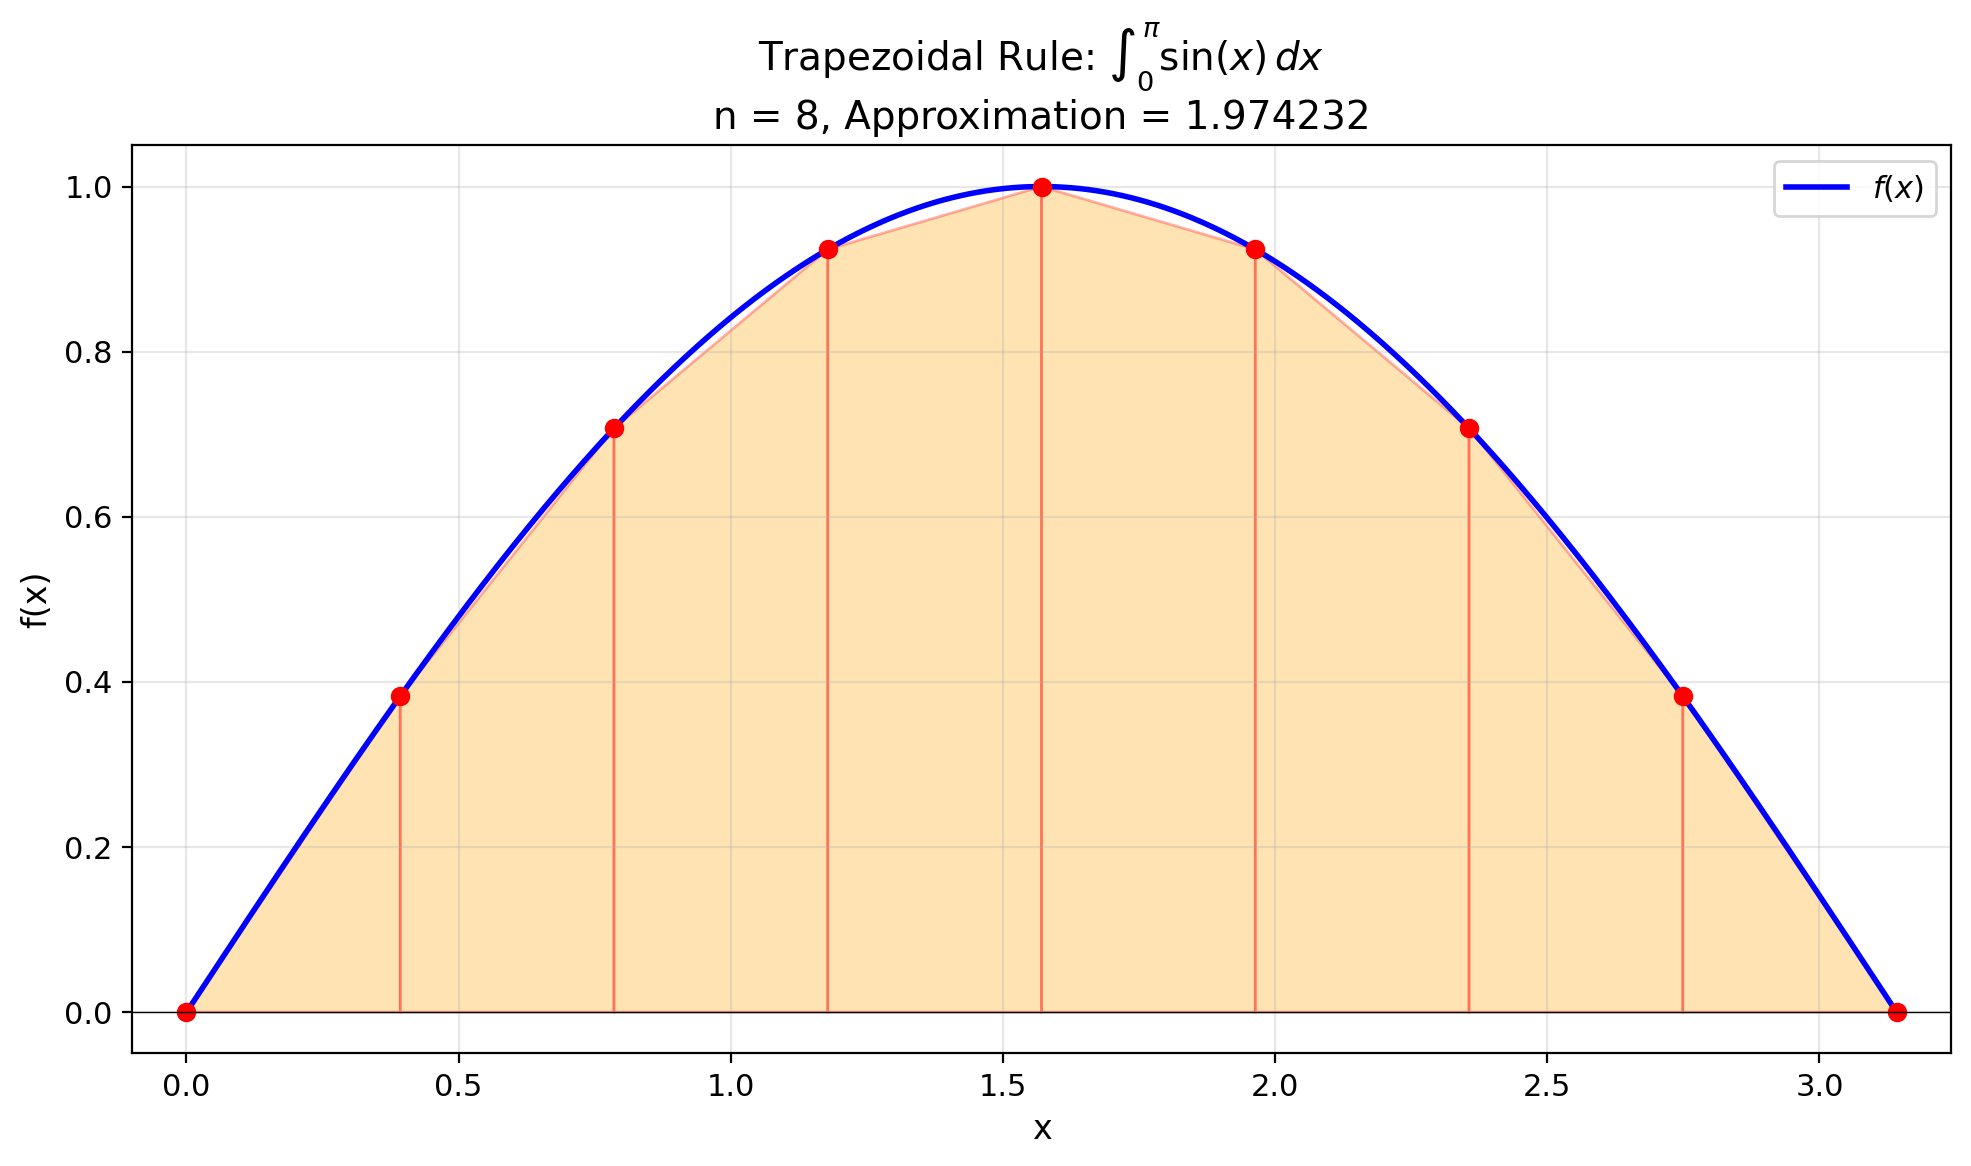


Exact value: 2.0
Approximation with n=8: 1.974232


In [7]:
def visualize_trapezoidal(f, a, b, n, title="Trapezoidal Rule Approximation"):
    """
    Visualize the trapezoidal rule approximation.
    """
    # Create fine grid for smooth curve
    x_fine = np.linspace(a, b, 1000)
    y_fine = f(x_fine)
    
    # Create grid for trapezoids
    x_trap = np.linspace(a, b, n + 1)
    y_trap = f(x_trap)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the function
    ax.plot(x_fine, y_fine, 'b-', linewidth=2, label='$f(x)$')
    
    # Fill trapezoids
    for i in range(n):
        xs = [x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]]
        ys = [0, y_trap[i], y_trap[i+1], 0]
        ax.fill(xs, ys, alpha=0.3, color='orange', edgecolor='red', linewidth=1)
    
    # Mark the grid points
    ax.plot(x_trap, y_trap, 'ro', markersize=6)
    
    # Calculate the approximation
    approx = trapezoidal_rule(f, a, b, n)
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.set_title(f'{title}\nn = {n}, Approximation = {approx:.6f}', fontsize=14)
    ax.legend(loc='best', fontsize=11)
    ax.set_xlim(a - 0.1, b + 0.1)
    
    return fig, ax

# Visualize with sin(x) on [0, π]
f_sin = lambda x: np.sin(x)
fig, ax = visualize_trapezoidal(f_sin, 0, np.pi, 8, 
                                 title=r"Trapezoidal Rule: $\int_0^\pi \sin(x)\,dx$")
exact_sin = 2.0  # Exact value
ax.axhline(y=0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

print(f"\nExact value: {exact_sin}")
print(f"Approximation with n=8: {trapezoidal_rule(f_sin, 0, np.pi, 8):.6f}")

## Convergence Analysis

We now demonstrate the $O(h^2)$ convergence rate by plotting the error vs. the number of subintervals on a log-log scale:

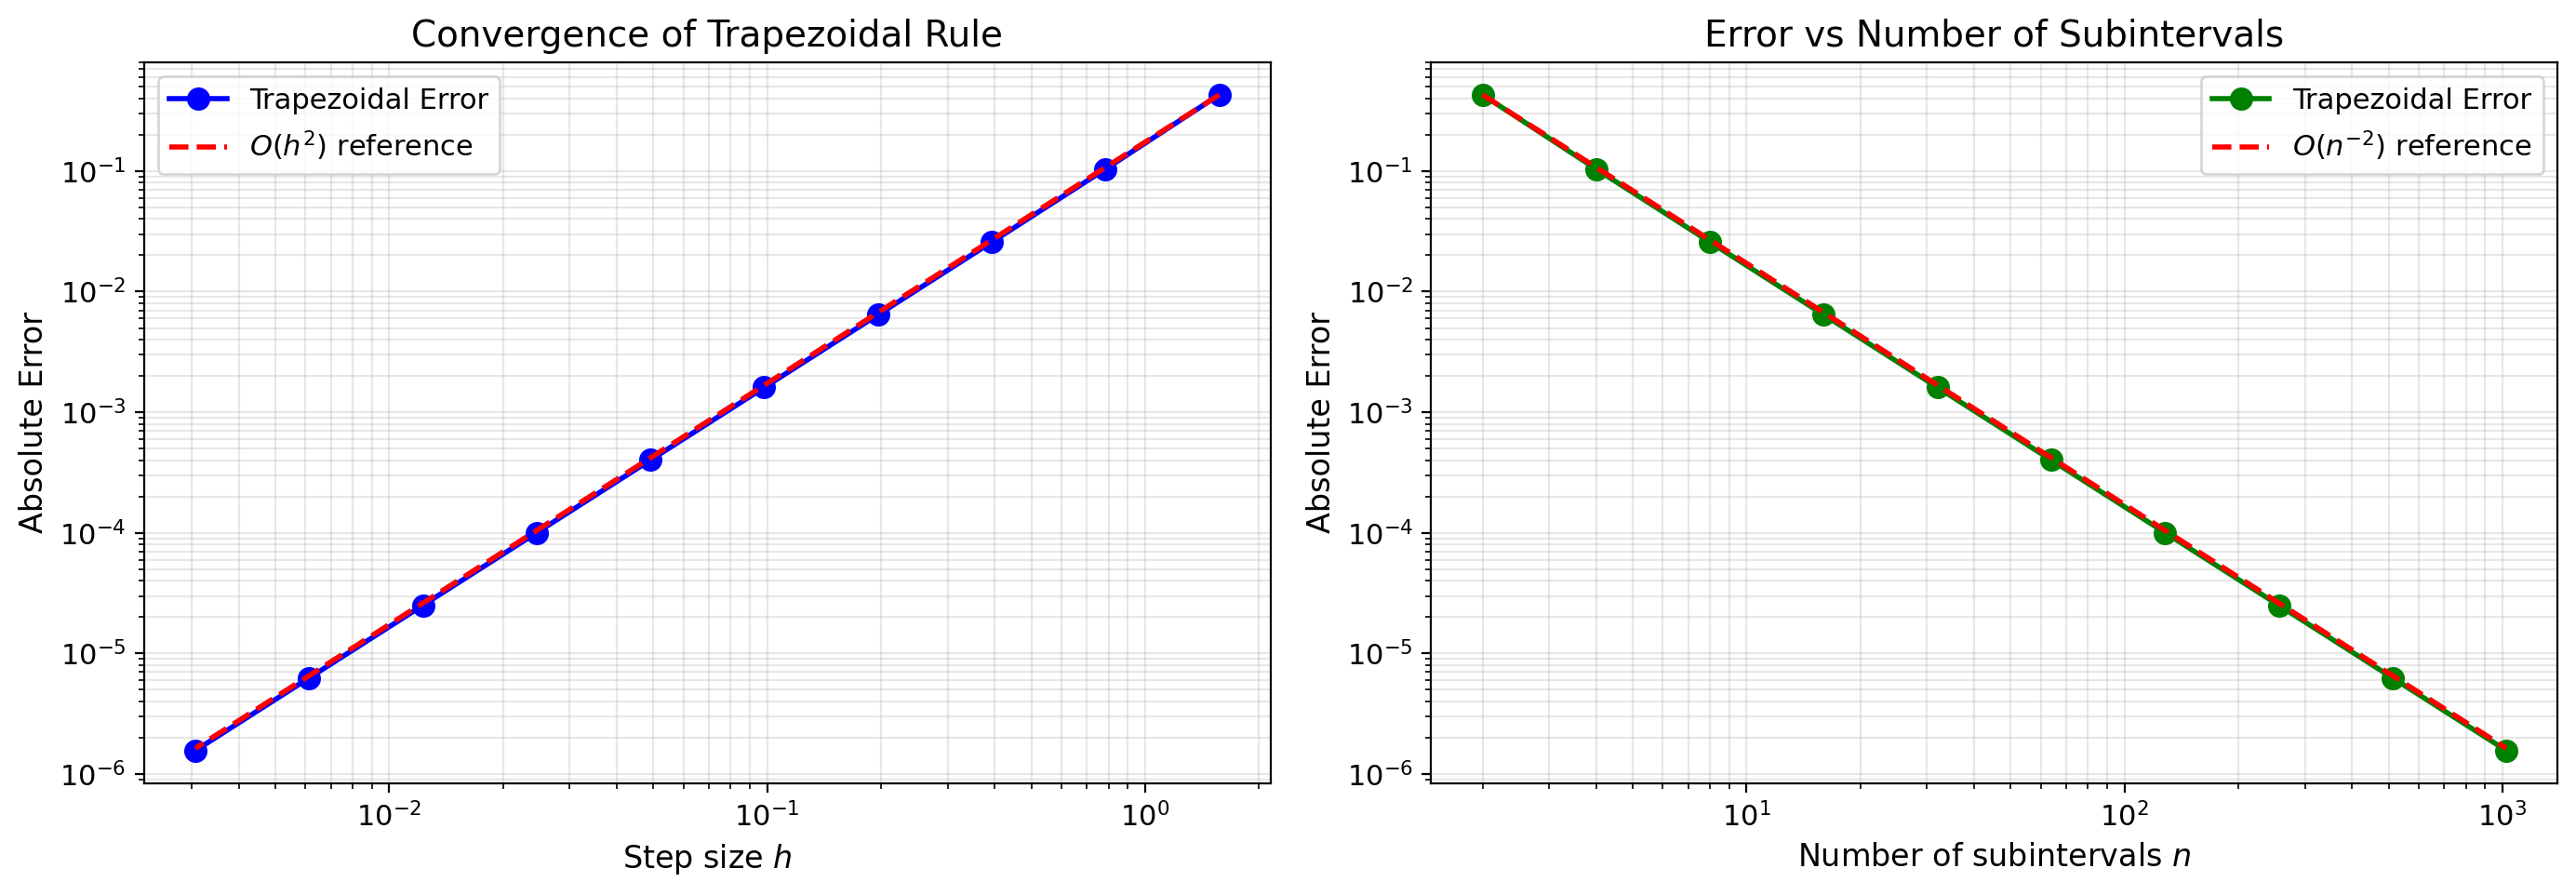

In [8]:
# Test function: f(x) = sin(x) on [0, π], exact integral = 2
f_test = lambda x: np.sin(x)
a, b = 0, np.pi
exact = 2.0

# Range of n values
n_range = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
h_range = (b - a) / n_range
errors = []

for n in n_range:
    approx = trapezoidal_rule(f_test, a, b, n)
    errors.append(abs(exact - approx))

errors = np.array(errors)

# Plot convergence
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Log-log plot of error vs h
ax1.loglog(h_range, errors, 'bo-', linewidth=2, markersize=8, label='Trapezoidal Error')

# Reference line for O(h²)
h_ref = np.array([h_range[0], h_range[-1]])
error_ref = errors[0] * (h_ref / h_range[0])**2
ax1.loglog(h_ref, error_ref, 'r--', linewidth=2, label='$O(h^2)$ reference')

ax1.set_xlabel('Step size $h$', fontsize=12)
ax1.set_ylabel('Absolute Error', fontsize=12)
ax1.set_title('Convergence of Trapezoidal Rule', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, which="both", ls="-", alpha=0.3)

# Log-log plot of error vs n
ax2.loglog(n_range, errors, 'go-', linewidth=2, markersize=8, label='Trapezoidal Error')

# Reference line for O(1/n²)
n_ref = np.array([n_range[0], n_range[-1]])
error_ref_n = errors[0] * (n_range[0] / n_ref)**2
ax2.loglog(n_ref, error_ref_n, 'r--', linewidth=2, label='$O(n^{-2})$ reference')

ax2.set_xlabel('Number of subintervals $n$', fontsize=12)
ax2.set_ylabel('Absolute Error', fontsize=12)
ax2.set_title('Error vs Number of Subintervals', fontsize=14)
ax2.legend(fontsize=11)
ax2.grid(True, which="both", ls="-", alpha=0.3)

plt.tight_layout()
plt.show()

## Comparison with Analytical Solution

Let's create a comprehensive comparison showing how the approximation converges to the exact value as we increase the number of subintervals:

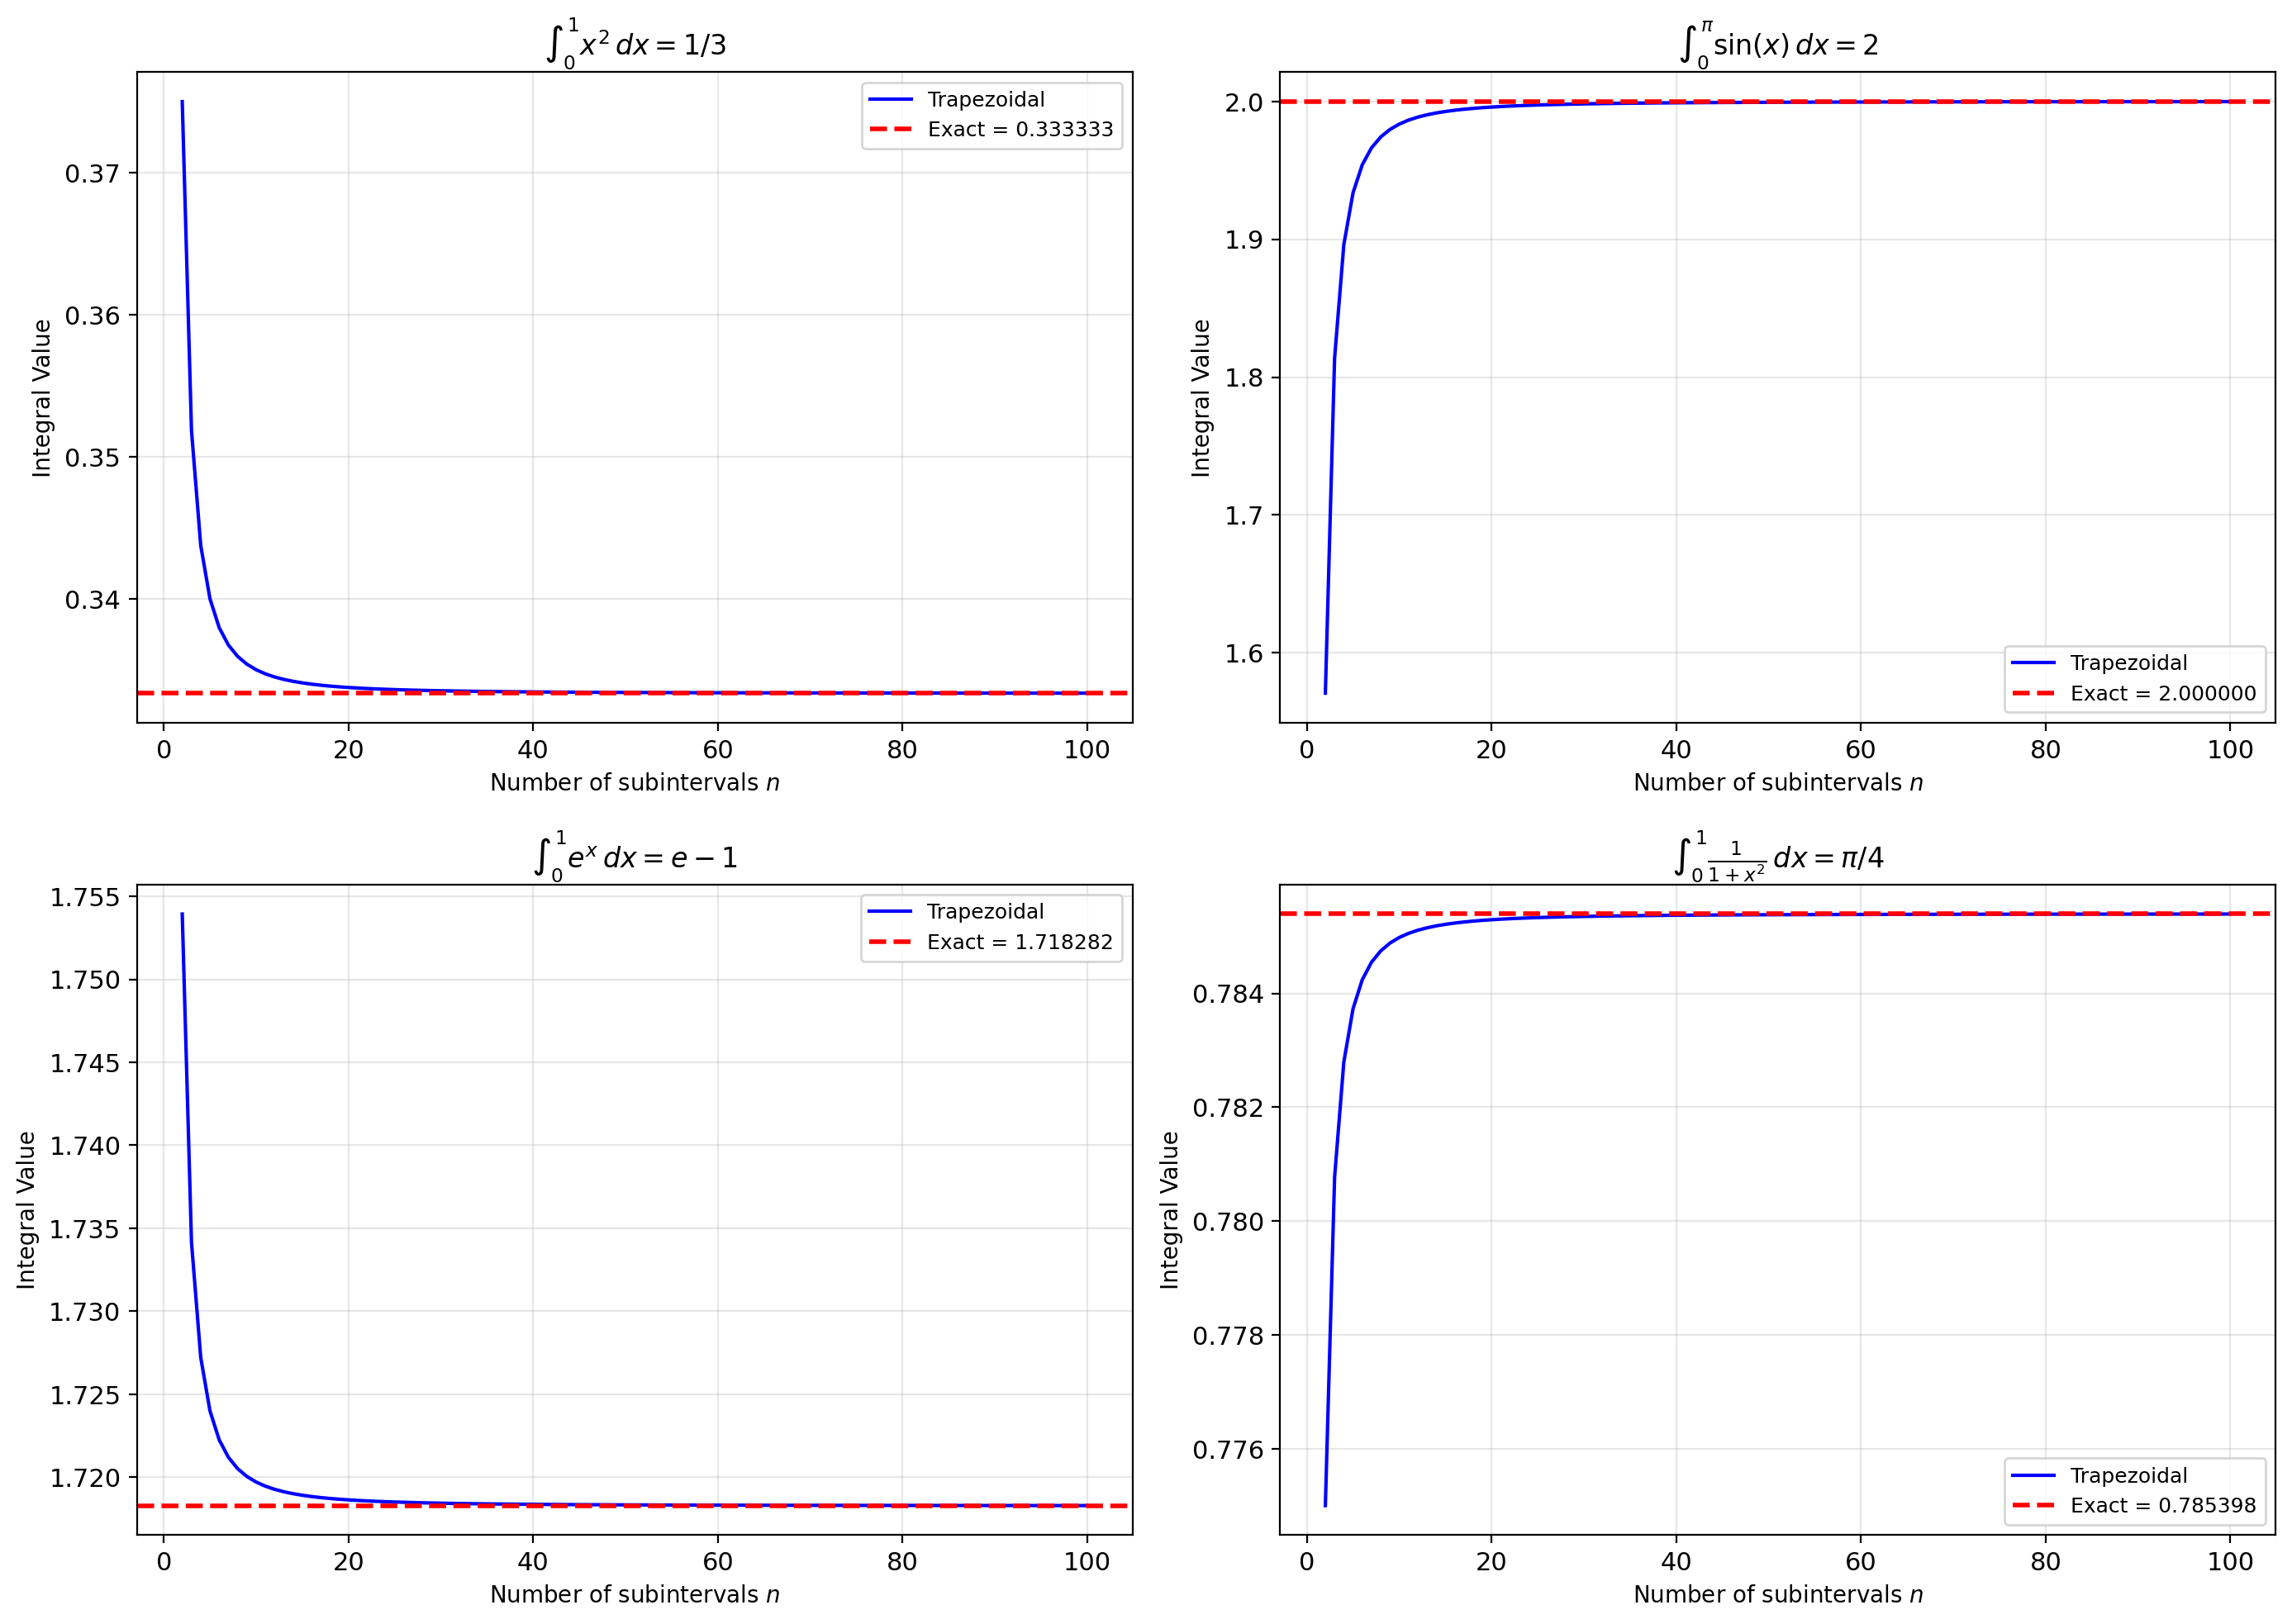

In [9]:
# Define multiple test functions with known integrals
test_cases = [
    (lambda x: x**2, 0, 1, 1/3, r"$\int_0^1 x^2\,dx = 1/3$"),
    (lambda x: np.sin(x), 0, np.pi, 2, r"$\int_0^\pi \sin(x)\,dx = 2$"),
    (lambda x: np.exp(x), 0, 1, np.e - 1, r"$\int_0^1 e^x\,dx = e-1$"),
    (lambda x: 1/(1 + x**2), 0, 1, np.pi/4, r"$\int_0^1 \frac{1}{1+x^2}\,dx = \pi/4$"),
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

n_values = np.arange(2, 101)

for idx, (f, a, b, exact, title) in enumerate(test_cases):
    approximations = [trapezoidal_rule(f, a, b, n) for n in n_values]
    
    ax = axes[idx]
    ax.plot(n_values, approximations, 'b-', linewidth=1.5, label='Trapezoidal')
    ax.axhline(y=exact, color='r', linestyle='--', linewidth=2, label=f'Exact = {exact:.6f}')
    
    ax.set_xlabel('Number of subintervals $n$', fontsize=10)
    ax.set_ylabel('Integral Value', fontsize=10)
    ax.set_title(title, fontsize=12)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Adaptive Trapezoidal Rule with Error Estimation

In practice, we often want to achieve a specified tolerance automatically. We can implement an adaptive version that doubles the number of points until the desired accuracy is reached:

In [10]:
def adaptive_trapezoidal(f, a, b, tol=1e-6, max_iter=20):
    """
    Adaptive trapezoidal integration with automatic error control.
    
    Uses Richardson extrapolation to estimate error.
    
    Parameters:
    -----------
    f : callable
        Function to integrate
    a, b : float
        Integration bounds
    tol : float
        Desired tolerance
    max_iter : int
        Maximum number of iterations
    
    Returns:
    --------
    tuple : (integral, error_estimate, n_final, iterations)
    """
    n = 1
    I_old = trapezoidal_rule(f, a, b, n)
    
    for iteration in range(1, max_iter + 1):
        n *= 2
        I_new = trapezoidal_rule(f, a, b, n)
        
        # Error estimate using Richardson extrapolation
        error_est = abs(I_new - I_old) / 3
        
        if error_est < tol:
            return I_new, error_est, n, iteration
        
        I_old = I_new
    
    return I_new, error_est, n, max_iter

# Test adaptive integration
f_test = lambda x: np.exp(-x**2)
a, b = 0, 2
exact_ref, _ = integrate.quad(f_test, a, b)

print("Adaptive Trapezoidal Rule: f(x) = exp(-x²) on [0, 2]")
print(f"Reference value (scipy.quad): {exact_ref:.10f}")
print("-" * 60)

tolerances = [1e-3, 1e-6, 1e-9, 1e-12]
for tol in tolerances:
    result, error_est, n_final, iterations = adaptive_trapezoidal(f_test, a, b, tol=tol)
    actual_error = abs(result - exact_ref)
    print(f"Tolerance: {tol:.0e}")
    print(f"  Result: {result:.12f}")
    print(f"  Actual error: {actual_error:.2e}")
    print(f"  Subintervals: {n_final}, Iterations: {iterations}")
    print()

Adaptive Trapezoidal Rule: f(x) = exp(-x²) on [0, 2]
Reference value (scipy.quad): 0.8820813908
------------------------------------------------------------
Tolerance: 1e-03
  Result: 0.881703791332
  Actual error: 3.78e-04
  Subintervals: 8, Iterations: 3

Tolerance: 1e-06
  Result: 0.882081018134
  Actual error: 3.73e-07
  Subintervals: 256, Iterations: 8

Tolerance: 1e-09
  Result: 0.882081390399
  Actual error: 3.64e-10
  Subintervals: 8192, Iterations: 13

Tolerance: 1e-12
  Result: 0.882081390762
  Actual error: 3.55e-13
  Subintervals: 262144, Iterations: 18



## Final Visualization: Summary Plot

We create a comprehensive summary figure showing the trapezoidal rule in action:

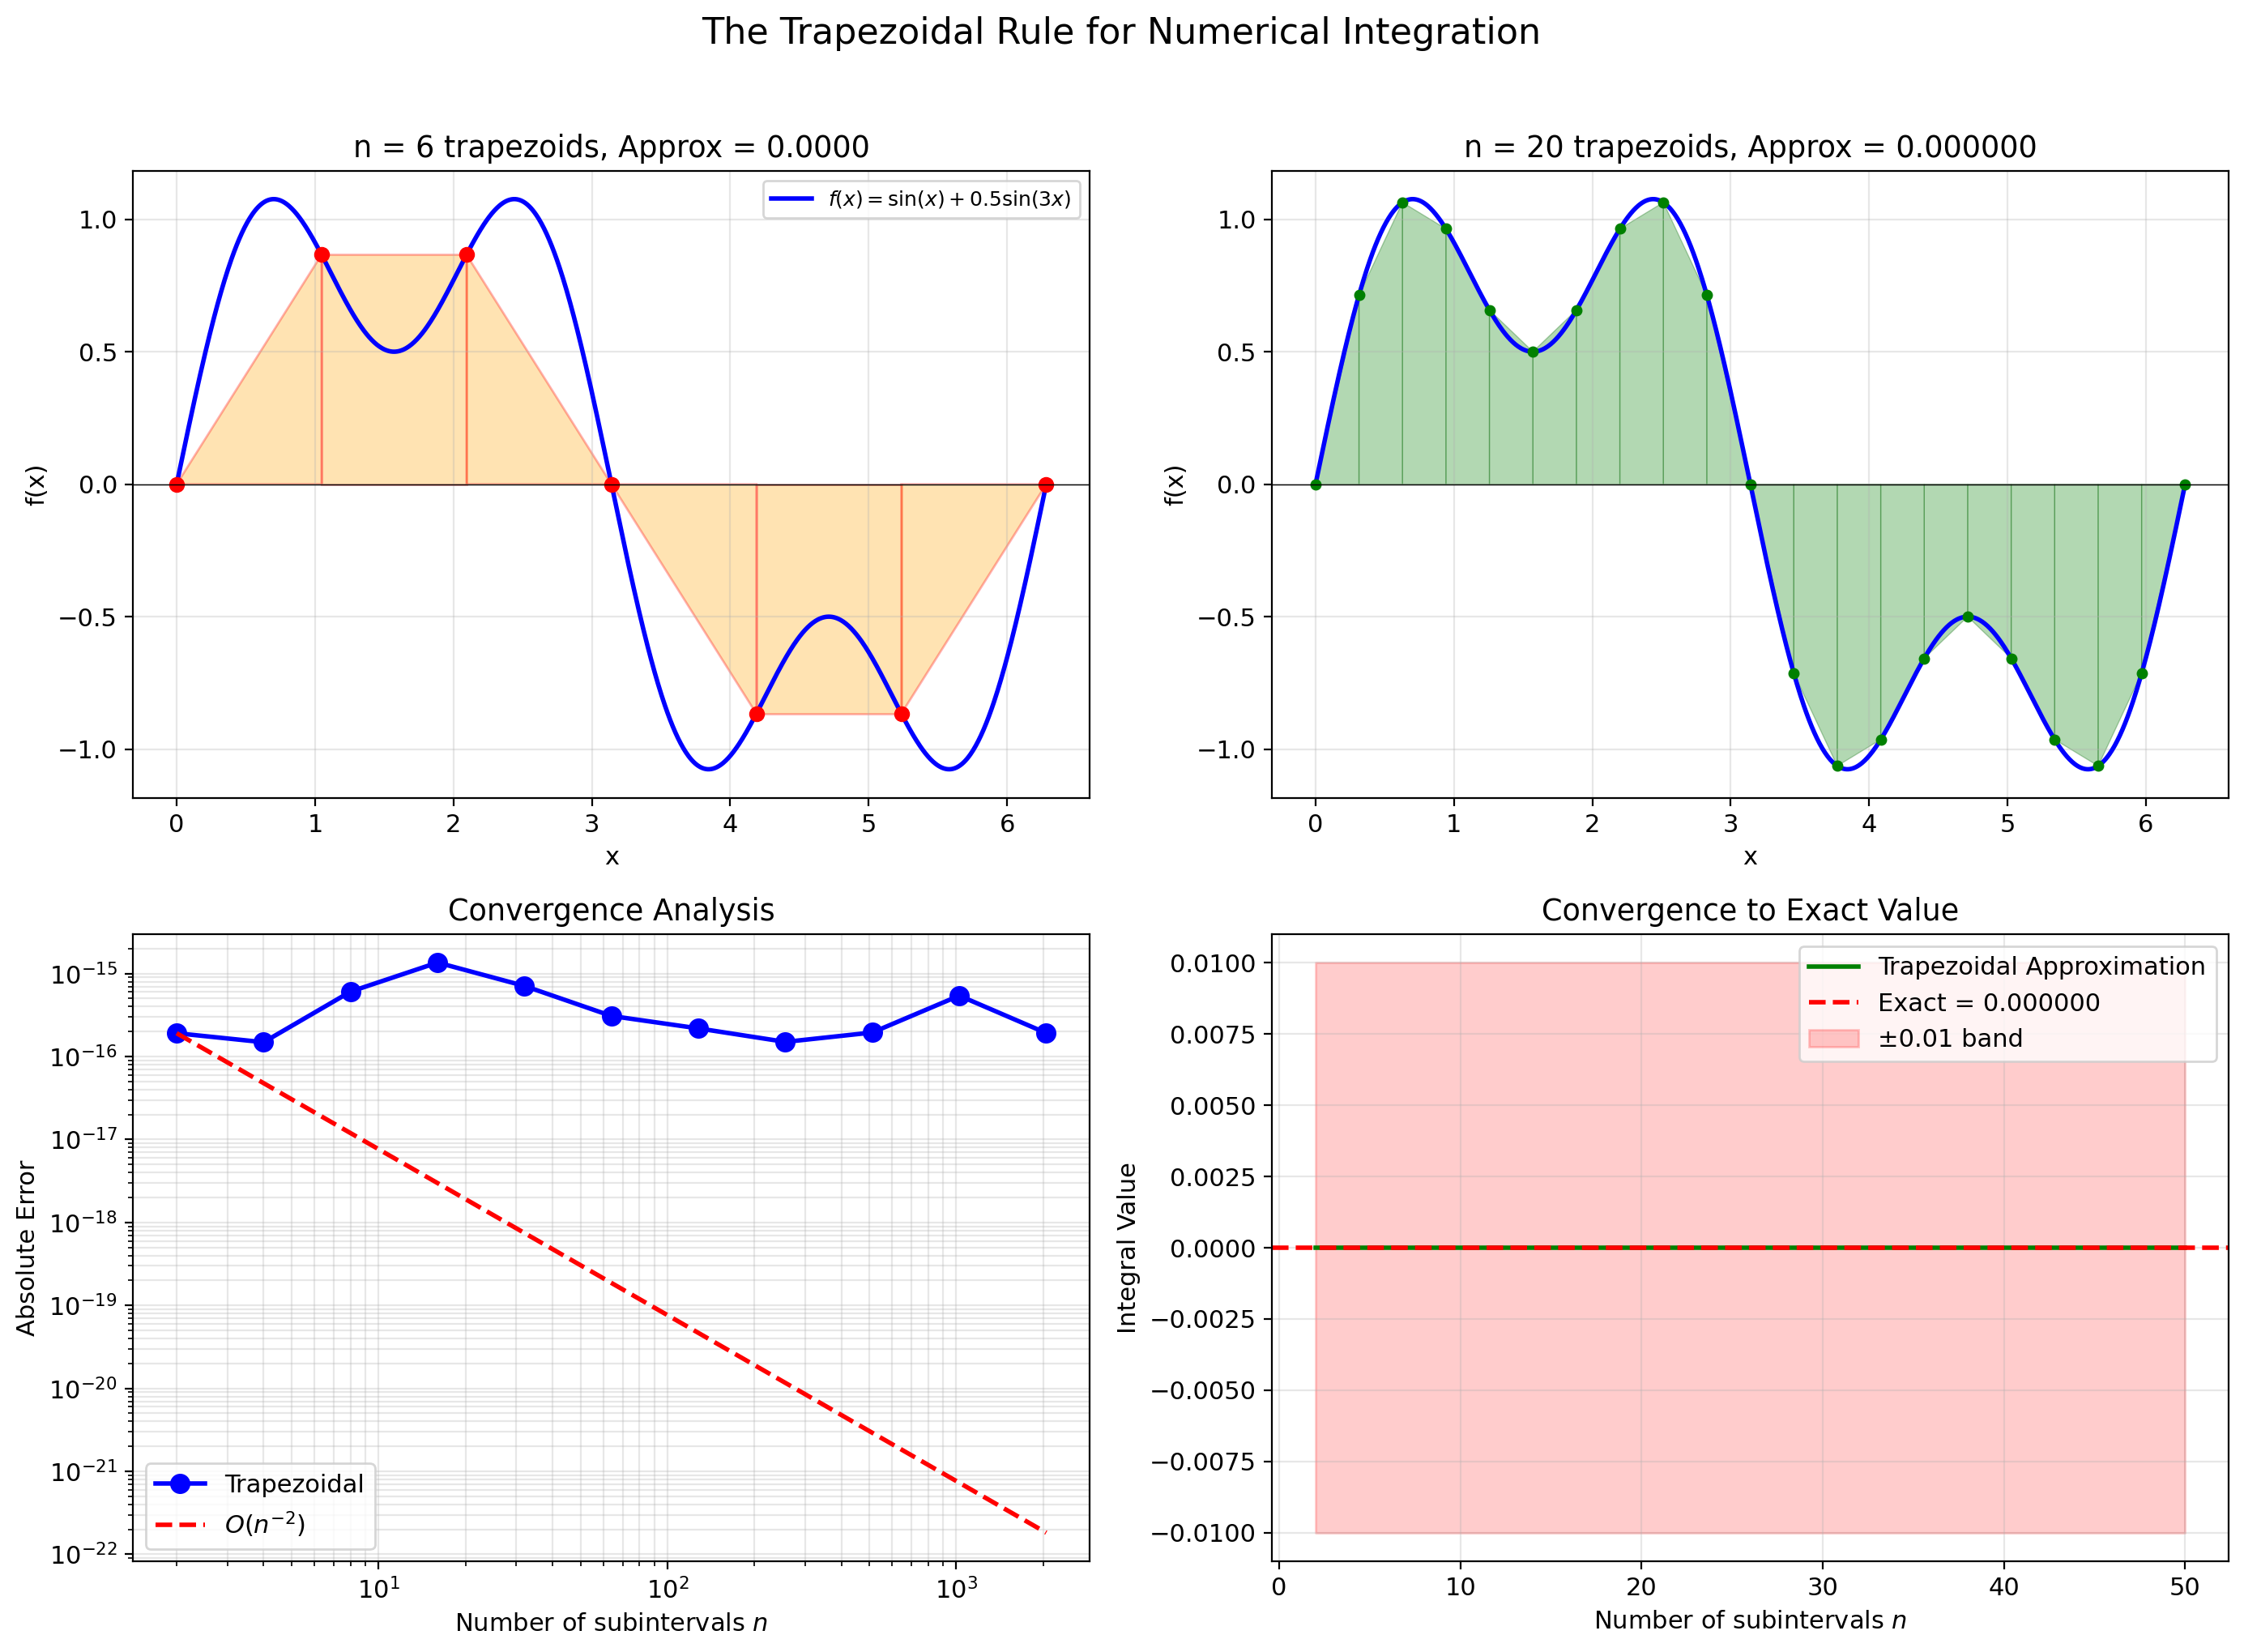


Figure saved to 'plot.png'
Exact integral value: 0.0000000000


In [11]:
# Create a comprehensive summary figure
fig = plt.figure(figsize=(14, 10))

# Define test function
f = lambda x: np.sin(x) + 0.5 * np.sin(3*x)
a, b = 0, 2*np.pi
exact_value, _ = integrate.quad(f, a, b)

# Subplot 1: Geometric interpretation with few trapezoids
ax1 = fig.add_subplot(2, 2, 1)
n = 6
x_fine = np.linspace(a, b, 1000)
y_fine = f(x_fine)
x_trap = np.linspace(a, b, n + 1)
y_trap = f(x_trap)

ax1.plot(x_fine, y_fine, 'b-', linewidth=2, label='$f(x) = \sin(x) + 0.5\sin(3x)$')
for i in range(n):
    xs = [x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]]
    ys = [0, y_trap[i], y_trap[i+1], 0]
    ax1.fill(xs, ys, alpha=0.3, color='orange', edgecolor='red', linewidth=1)
ax1.plot(x_trap, y_trap, 'ro', markersize=6)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title(f'n = {n} trapezoids, Approx = {trapezoidal_rule(f, a, b, n):.4f}')
ax1.legend(loc='upper right', fontsize=9)

# Subplot 2: More trapezoids
ax2 = fig.add_subplot(2, 2, 2)
n = 20
x_trap = np.linspace(a, b, n + 1)
y_trap = f(x_trap)

ax2.plot(x_fine, y_fine, 'b-', linewidth=2)
for i in range(n):
    xs = [x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]]
    ys = [0, y_trap[i], y_trap[i+1], 0]
    ax2.fill(xs, ys, alpha=0.3, color='green', edgecolor='darkgreen', linewidth=0.5)
ax2.plot(x_trap, y_trap, 'go', markersize=4)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title(f'n = {n} trapezoids, Approx = {trapezoidal_rule(f, a, b, n):.6f}')

# Subplot 3: Convergence plot
ax3 = fig.add_subplot(2, 2, 3)
n_range = 2**np.arange(1, 12)
errors = [abs(exact_value - trapezoidal_rule(f, a, b, n)) for n in n_range]

ax3.loglog(n_range, errors, 'bo-', linewidth=2, markersize=8, label='Trapezoidal')
# O(n^-2) reference
ref_line = errors[0] * (n_range[0] / n_range)**2
ax3.loglog(n_range, ref_line, 'r--', linewidth=2, label='$O(n^{-2})$')
ax3.set_xlabel('Number of subintervals $n$')
ax3.set_ylabel('Absolute Error')
ax3.set_title('Convergence Analysis')
ax3.legend()
ax3.grid(True, which='both', alpha=0.3)

# Subplot 4: Approximation vs n
ax4 = fig.add_subplot(2, 2, 4)
n_vals = np.arange(2, 51)
approx_vals = [trapezoidal_rule(f, a, b, n) for n in n_vals]

ax4.plot(n_vals, approx_vals, 'g-', linewidth=2, label='Trapezoidal Approximation')
ax4.axhline(y=exact_value, color='r', linestyle='--', linewidth=2, 
            label=f'Exact = {exact_value:.6f}')
ax4.fill_between(n_vals, exact_value - 0.01, exact_value + 0.01, 
                  alpha=0.2, color='red', label='±0.01 band')
ax4.set_xlabel('Number of subintervals $n$')
ax4.set_ylabel('Integral Value')
ax4.set_title('Convergence to Exact Value')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.suptitle('The Trapezoidal Rule for Numerical Integration', fontsize=16, y=1.02)
plt.tight_layout()

# Save the figure
plt.savefig('plot.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nFigure saved to 'plot.png'")
print(f"Exact integral value: {exact_value:.10f}")

## Conclusion

The **Trapezoidal Rule** is a foundational numerical integration method with the following key properties:

1. **Simplicity**: Easy to implement and understand geometrically
2. **Second-order accuracy**: Error scales as $O(h^2)$
3. **Stability**: Well-behaved for smooth functions
4. **Versatility**: Applicable to any continuous function

### Limitations

- Linear approximation may be poor for rapidly varying functions
- Requires many subintervals for high accuracy
- Higher-order methods (Simpson's rule, Gaussian quadrature) often more efficient

### When to Use

- Quick estimates of integrals
- Smooth, well-behaved functions
- As a building block for more sophisticated adaptive methods
- When simplicity is preferred over optimal efficiency

The trapezoidal rule remains a cornerstone of numerical analysis and serves as an excellent introduction to the broader field of numerical integration techniques.